## Importieren der Bibliotheken für das Modell

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

2024-09-26 19:08:27.701070: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 19:08:27.709126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 19:08:27.718240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 19:08:27.720827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 19:08:27.728167: I tensorflow/core/platform/cpu_feature_guar

## Bildparameter und Klassen

In [5]:
img_height, img_width = 218, 178
num_classes = 4

data_dir = '/home/patrick/Dokumente/Datageneration/bg'
 

## Modell erstellen 

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/home/patrick/Dokumente/Bachelorarbeit/my-venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 216, 176, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 216, 176, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 108, 88, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 86, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 106, 86, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 51, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 51, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25344)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,976,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,369,028 (51.00 MB)

 Trainable params: 13,368,068 (51.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Daten vorbereiten

In [10]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotation um 20%
    width_shift_range=0.2,  # Verschiebung in der Breite um bis zu 20%
    height_shift_range=0.2, # Verschiebung in der Länge um bis zu 20%
    zoom_range=0.2,         # Zoom bis 20%
    horizontal_flip=True,   # Horizontale Spiegelung
    validation_split=0.2  # Automatischer Split 80% Training, 20% Validierung
)

# Trainingsdaten (80%)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Automatisch die Trainingsdaten auswählen
)

# Validierungsdaten (20%)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Automatisch die Validierungsdaten auswählen
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


## Early Stopping

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Automatisches Abbrechen des Trainings anhand des Validation Loss mit einer Patience von 10

## Modell trainieren

In [9]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/100


/home/patrick/Dokumente/Bachelorarbeit/my-venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 496ms/step - accuracy: 0.3690 - loss: 6.8763 - val_accuracy: 0.2500 - val_loss: 12.0107
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 490ms/step - accuracy: 0.4397 - loss: 1.4659 - val_accuracy: 0.2500 - val_loss: 8.1903
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 489ms/step - accuracy: 0.4592 - loss: 1.3018 - val_accuracy: 0.2750 - val_loss: 4.1294
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 488ms/step - accuracy: 0.5226 - loss: 1.1240 - val_accuracy: 0.2650 - val_loss: 3.3704
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 488ms/step - accuracy: 0.5647 - loss: 1.0189 - val_accuracy: 0.4387 - val_loss: 1.2602
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 487ms/step - accuracy: 0.5557 - loss: 1.0346 - val_accuracy: 0.3425 - val_loss: 1.4789
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 489ms/step - accuracy: 0.5843 - loss: 0.9437 - val_accuracy: 0.4350 - val_loss: 3.3386
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 489ms/step - accuracy: 0.6259 - loss: 0.92

In [10]:
model.save('1000_bg.keras')

## Modell evaluieren

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.7968 - loss: 0.5926


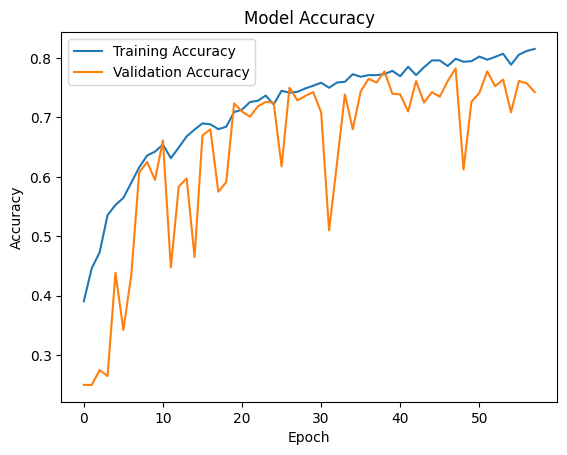

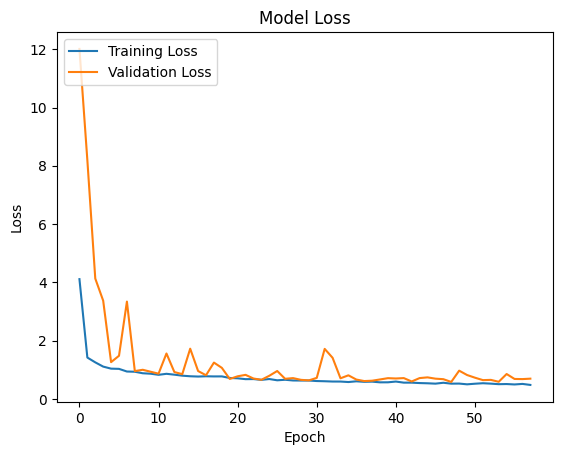

In [11]:
model.evaluate(validation_generator)

# Trainingsergebnisse plotten
import matplotlib.pyplot as plt

# Plot für die Genauigkeit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot für den Verlust
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()